# Stock Exchange Data Analysis

## Import Libraries

In [2]:
import pandas
from sklearn.model_selection import train_test_split


## Data Exploration

### Load and Filter the Data


In [3]:
# Load the stock data and check whether it has been loaded correctly.
data = pandas.read_csv("data/index_processed.csv")
print("Data Info Overview:")
data.info()

print("\nData After Removing Columns:")
# Restrict analysis to focus on the adjusted close price of each index per day.
data = data[["Date", "Index", "Adj Close"]]
display(data)


Data Info Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104224 entries, 0 to 104223
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      104224 non-null  object 
 1   Date       104224 non-null  object 
 2   Open       104224 non-null  float64
 3   High       104224 non-null  float64
 4   Low        104224 non-null  float64
 5   Close      104224 non-null  float64
 6   Adj Close  104224 non-null  float64
 7   Volume     104224 non-null  float64
 8   CloseUSD   104224 non-null  float64
dtypes: float64(7), object(2)
memory usage: 7.2+ MB

Data After Removing Columns:


,Date,Index,Adj Close
0,1986-12-31,HSI,2568.300049
1,1987-01-02,HSI,2540.100098
2,1987-01-05,HSI,2552.399902
3,1987-01-06,HSI,2583.899902
4,1987-01-07,HSI,2607.100098
...,...,...,...
104219,2021-05-25,J203.JO,66076.679690
104220,2021-05-26,J203.JO,66108.226560
104221,2021-05-27,J203.JO,66940.250000
104222,2021-05-28,J203.JO,67554.859380


### Split the Data by Index

In [4]:
# Split the data set by 'Index' column.
data_frames_per_index = {
    key: data.loc[value] for key, value in data.groupby("Index").groups.items()
}

# Show how many rows of data are available for each index.
print("Sample Size Per Index:")
for index, data_frame in data_frames_per_index.items():
    print(f"{index}: {len(data_frame)}")


Sample Size Per Index:
000001.SS: 5791
399001.SZ: 5760
GDAXI: 8438
GSPTSE: 10526
HSI: 8492
IXIC: 12690
J203.JO: 2346
N100: 5474
N225: 13874
NSEI: 3346
NYA: 13947
SSMI: 7671
TWII: 5869


## Feature Engineering

### Simple Moving Averages

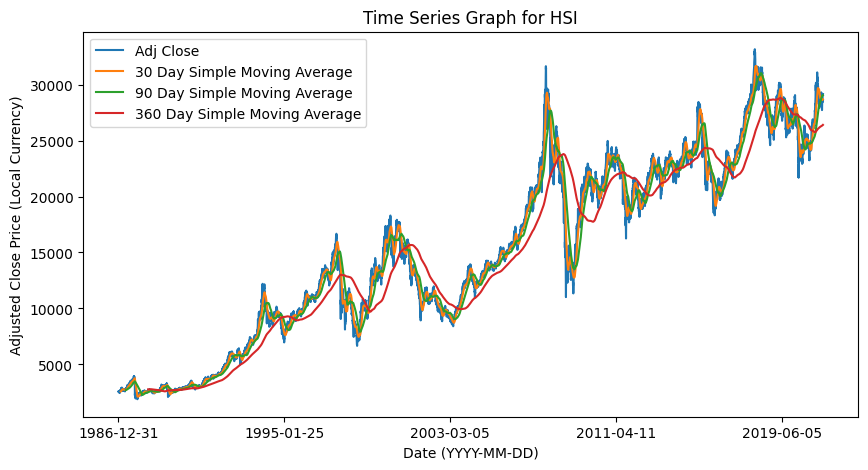

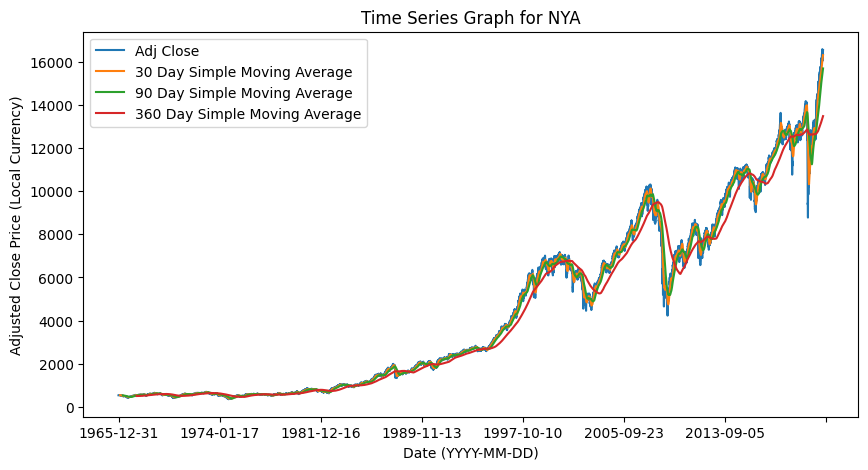

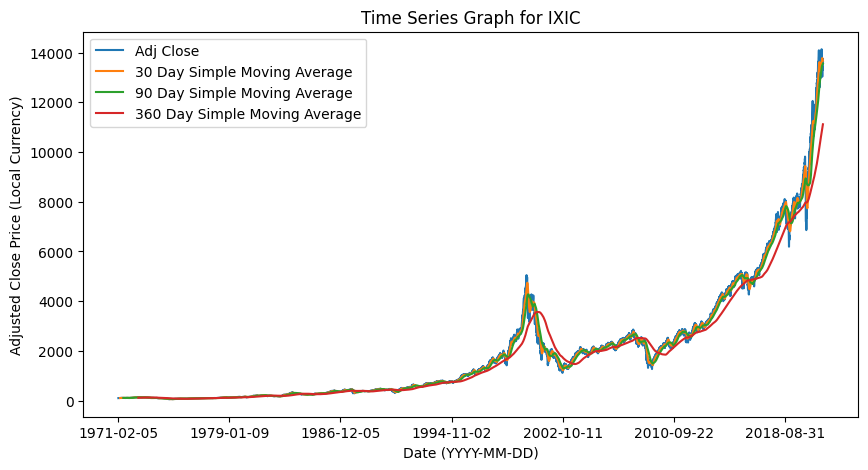

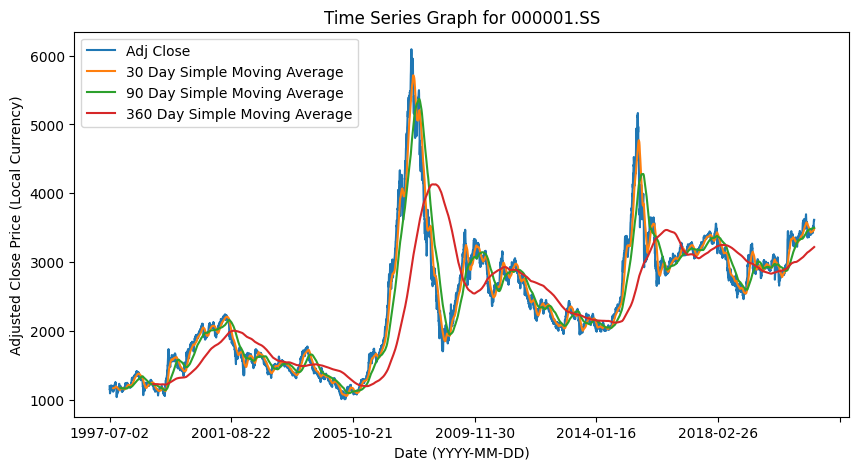

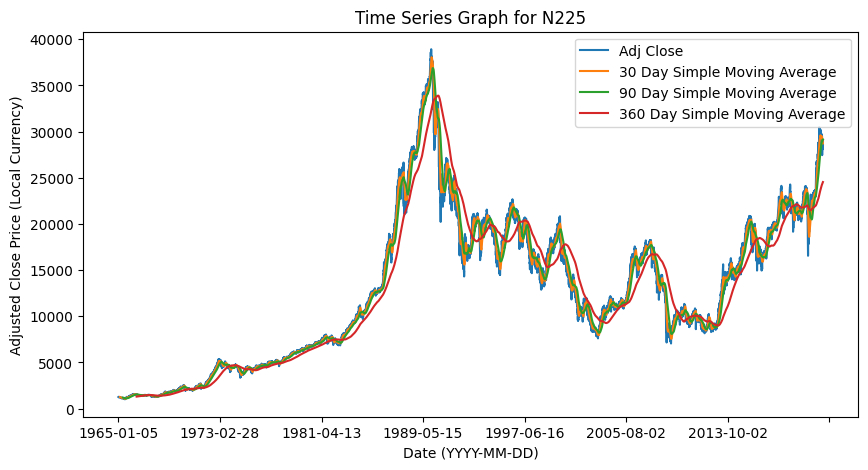

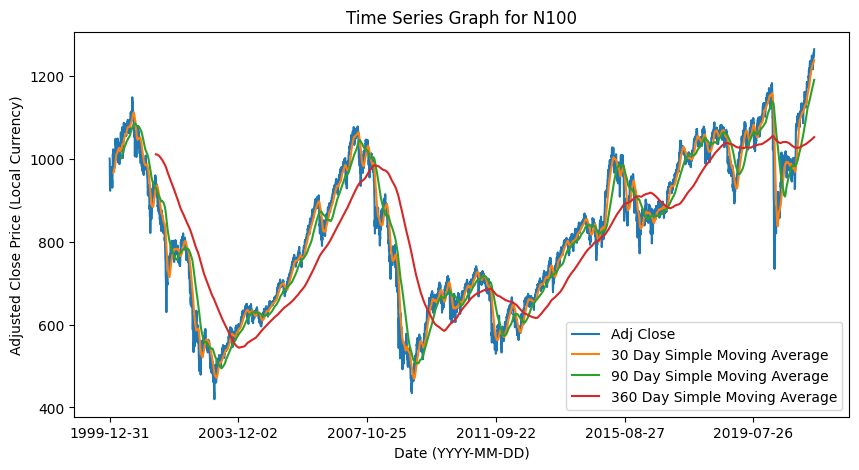

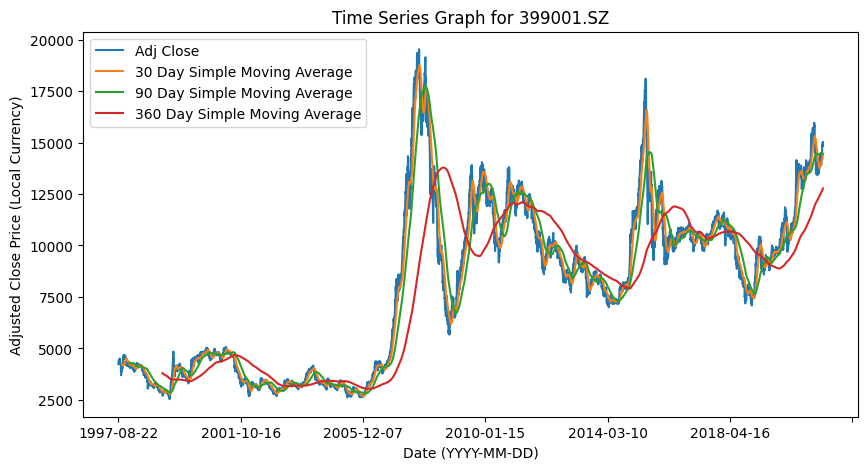

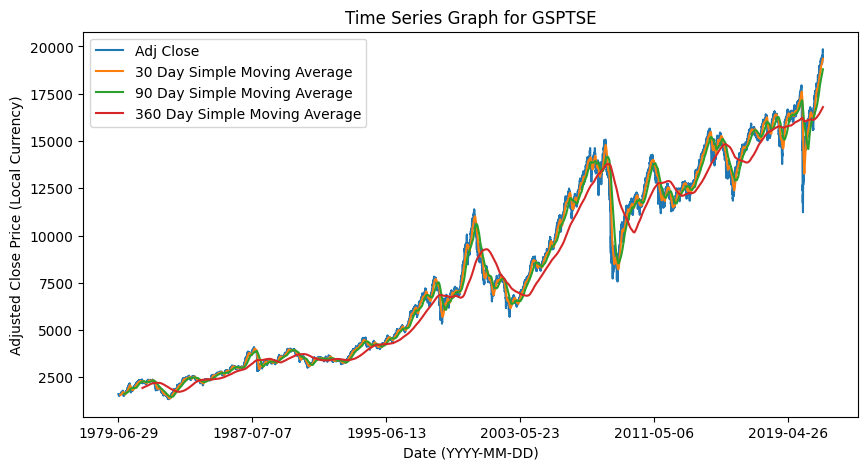

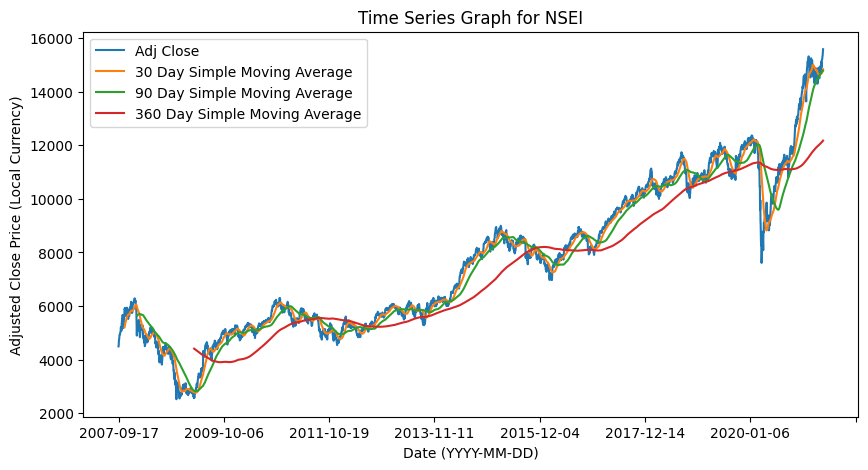

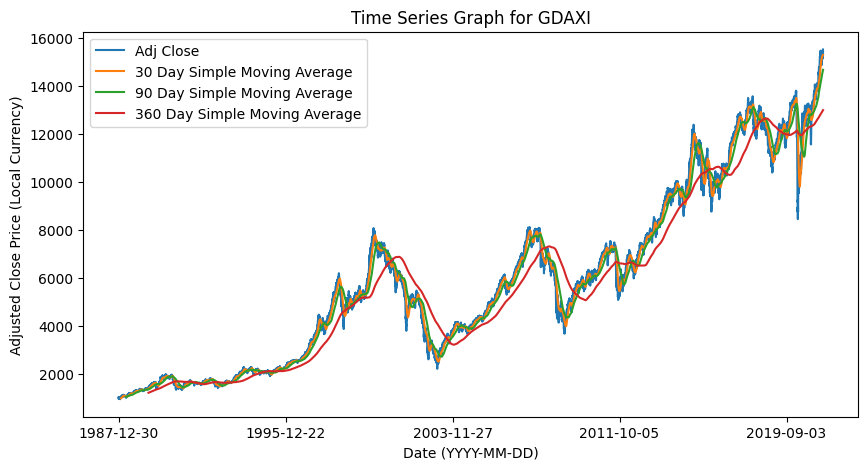

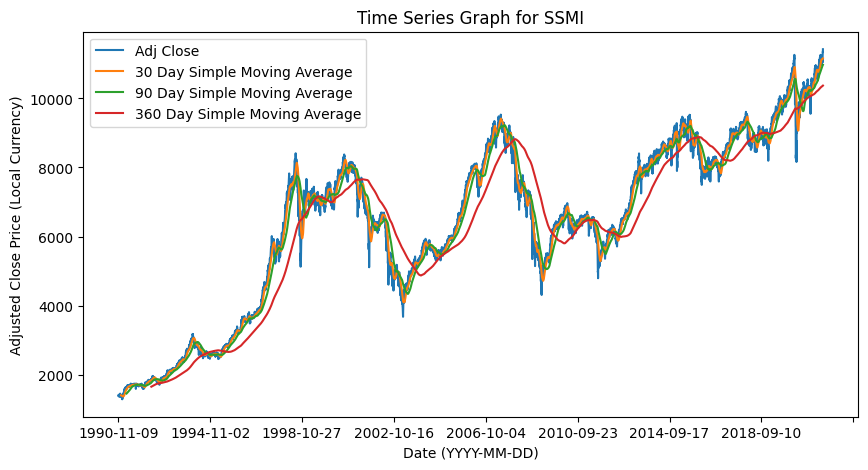

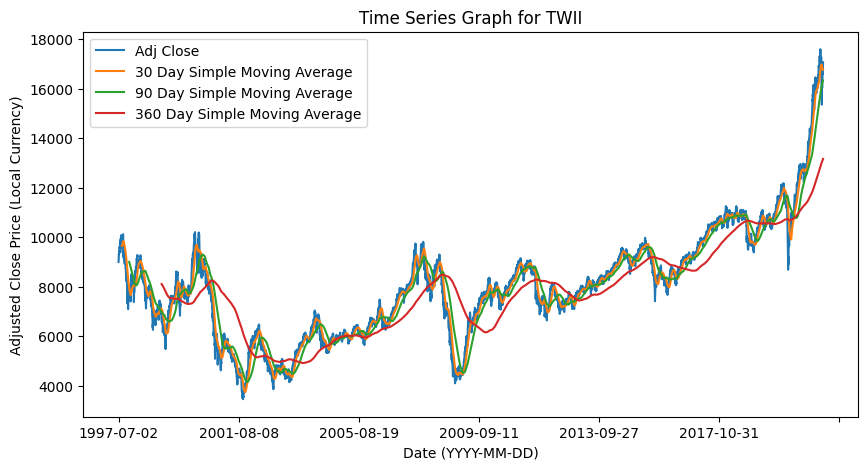

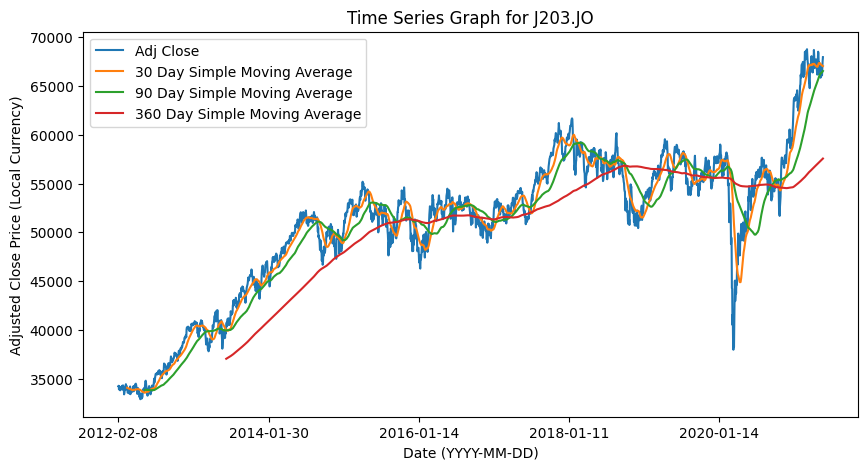

In [5]:
# Calculate simple moving averages for each index.
for index in data["Index"].unique():
    # Increasing the window size smooths the data, but reduces the accuracy.
    data_frames_per_index[index]["30 Day Simple Moving Average"] = (
        data_frames_per_index[index]["Adj Close"].rolling(30).mean()
    )
    data_frames_per_index[index]["90 Day Simple Moving Average"] = (
        data_frames_per_index[index]["Adj Close"].rolling(90).mean()
    )
    data_frames_per_index[index]["360 Day Simple Moving Average"] = (
        data_frames_per_index[index]["Adj Close"].rolling(360).mean()
    )

# Generate a time series graph for each index.
for index in data["Index"].unique():
    data_frames_per_index[index].plot(
        x="Date",
        y=[
            "Adj Close",
            "30 Day Simple Moving Average",
            "90 Day Simple Moving Average",
            "360 Day Simple Moving Average",
        ],
        xlabel="Date (YYYY-MM-DD)",
        ylabel="Adjusted Close Price (Local Currency)",
        title=f"Time Series Graph for {index}",
        figsize=(10, 5),
    )


### Exponential Moving Averages

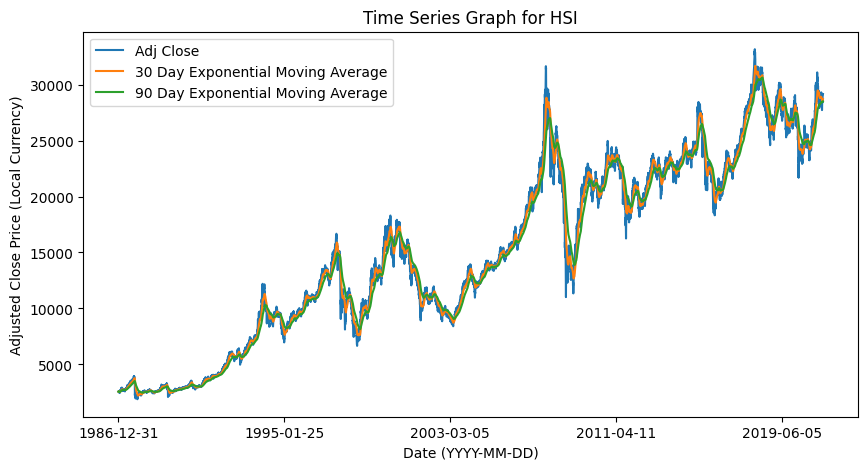

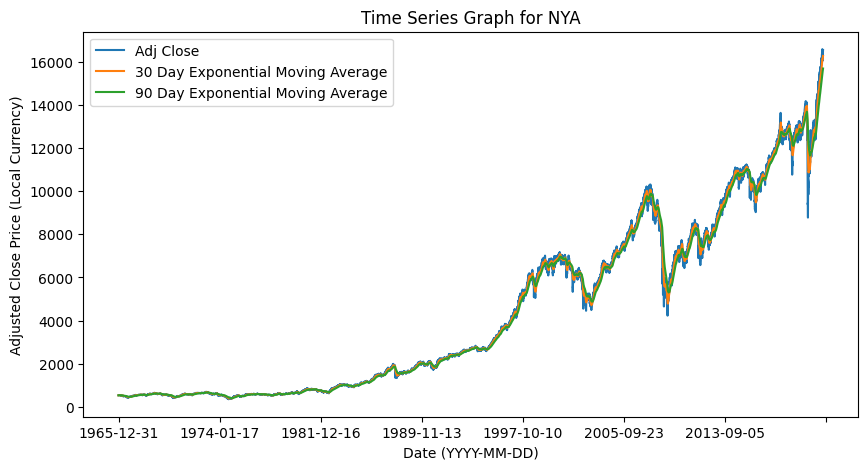

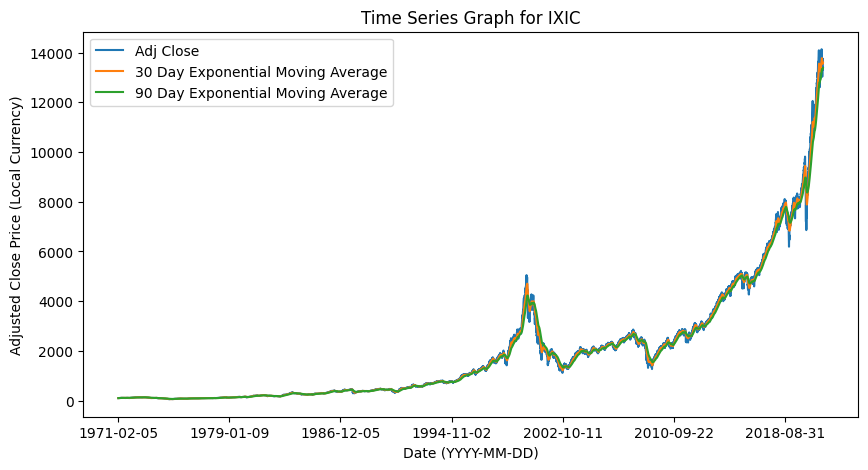

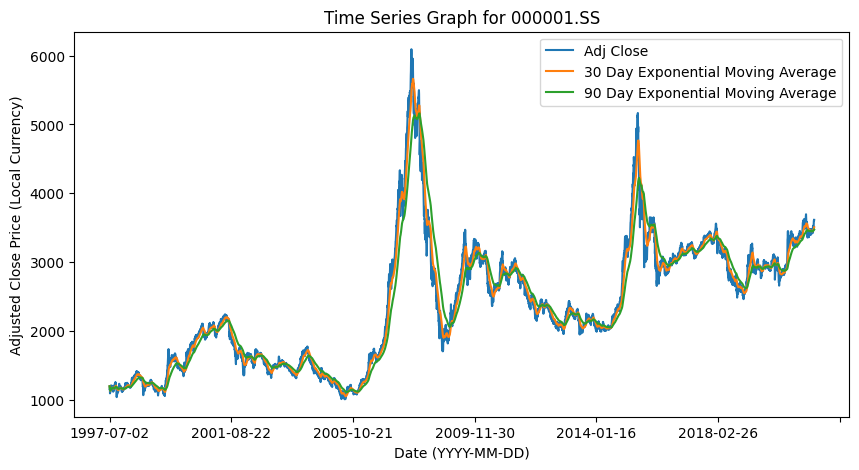

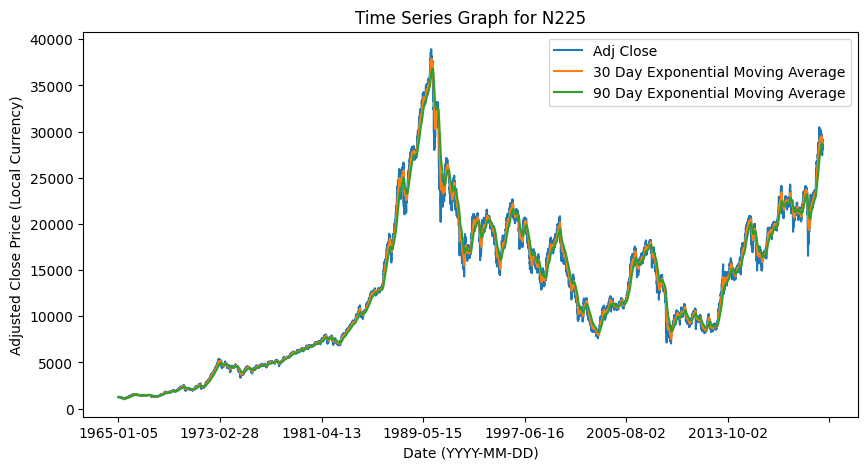

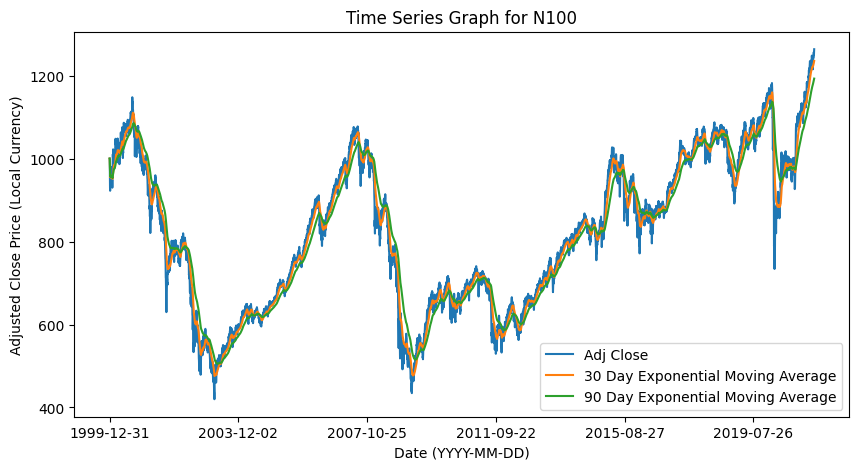

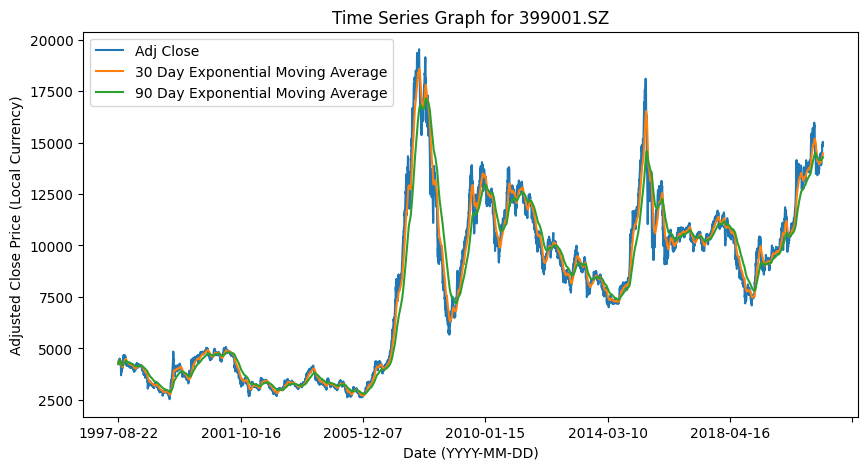

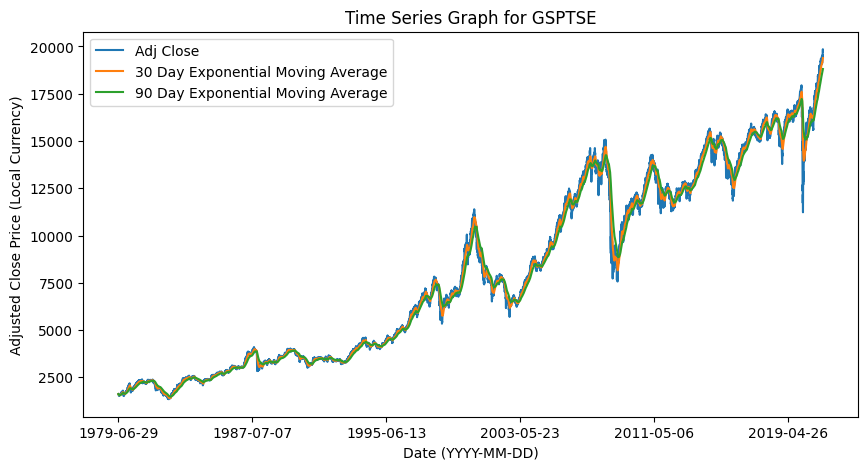

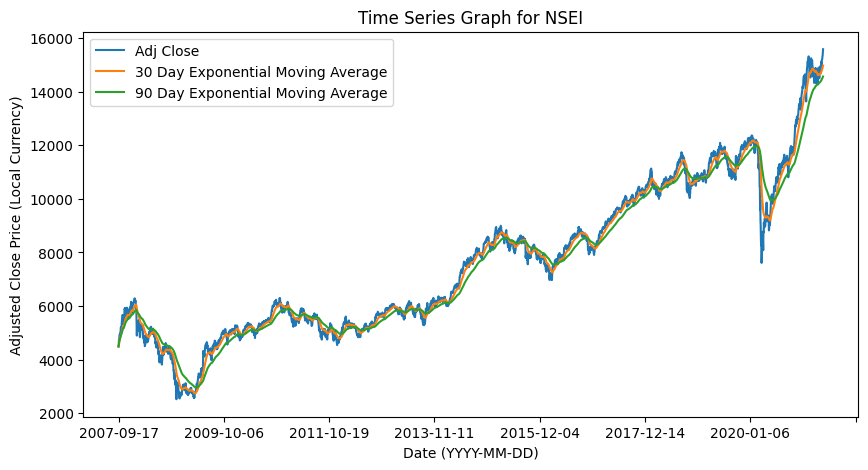

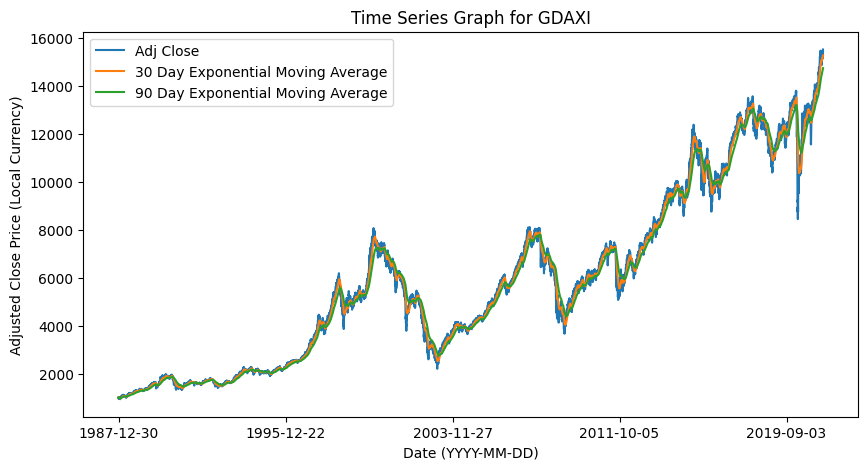

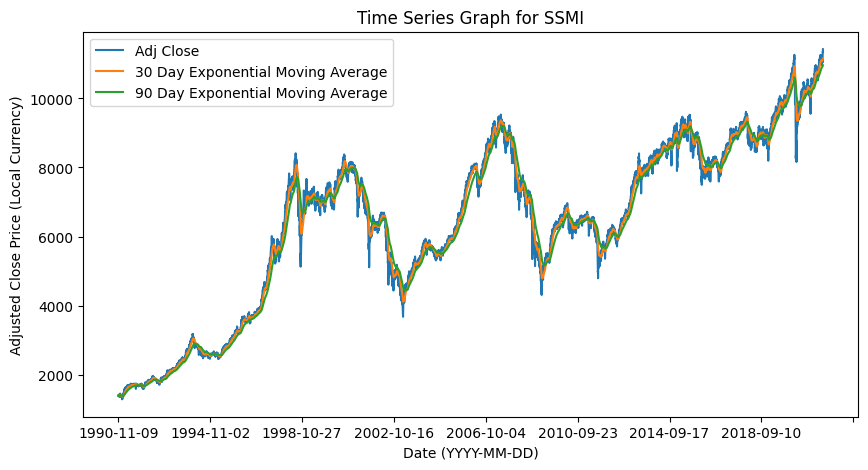

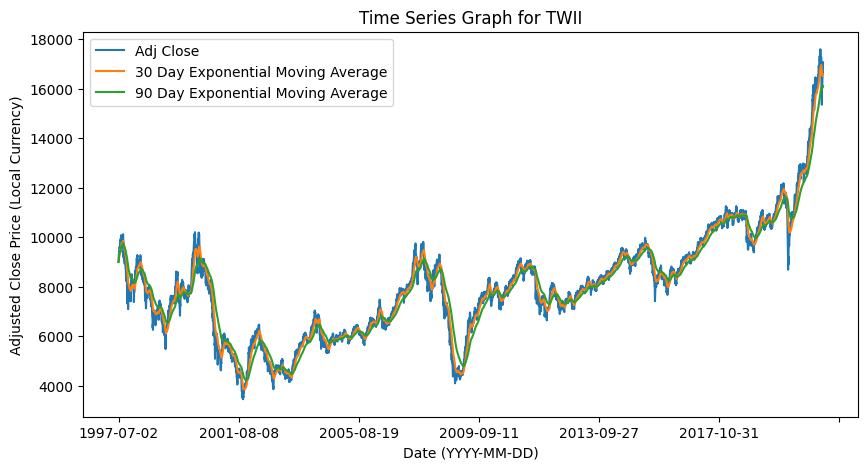

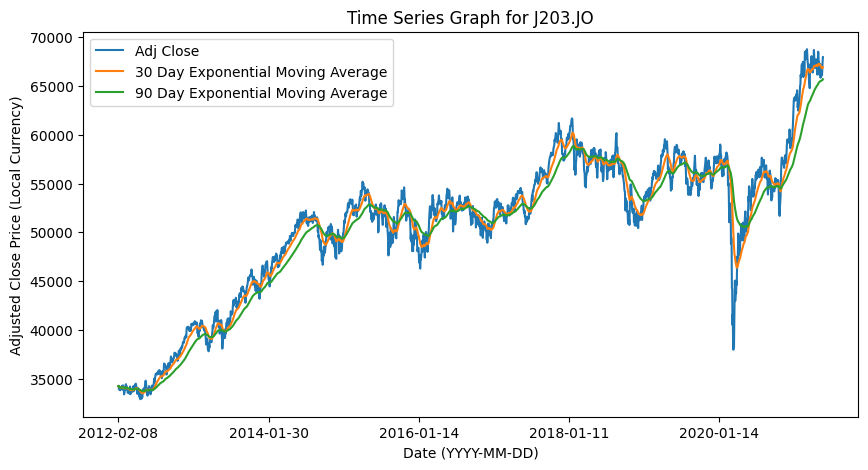

In [19]:
for index in data["Index"].unique():
    # Calculate 30 and 90 day exponential moving averages for each index.
    data_frames_per_index[index]["30 Day Exponential Moving Average"] = (
        data_frames_per_index[index]["Adj Close"].ewm(span=30).mean()
    )
    data_frames_per_index[index]["90 Day Exponential Moving Average"] = (
        data_frames_per_index[index]["Adj Close"].ewm(span=90).mean()
    )

# Generate a time series graph for each index.
for index in data["Index"].unique():
    data_frames_per_index[index].plot(
        x="Date",
        y=[
            "Adj Close",
            # "30 Day Simple Moving Average",
            # "90 Day Simple Moving Average",
            "30 Day Exponential Moving Average",
            "90 Day Exponential Moving Average",
        ],
        xlabel="Date (YYYY-MM-DD)",
        ylabel="Adjusted Close Price (Local Currency)",
        title=f"Time Series Graph for {index}",
        figsize=(10, 5),
    )


## Data Cleaning

### Selecting Moving Average Strategy


<AxesSubplot: title={'center': 'Time Series Graph for New York Stock Exchange (NYA)'}, xlabel='Date (YYYY-MM-DD)', ylabel='Adjusted Close Price (USD)'>

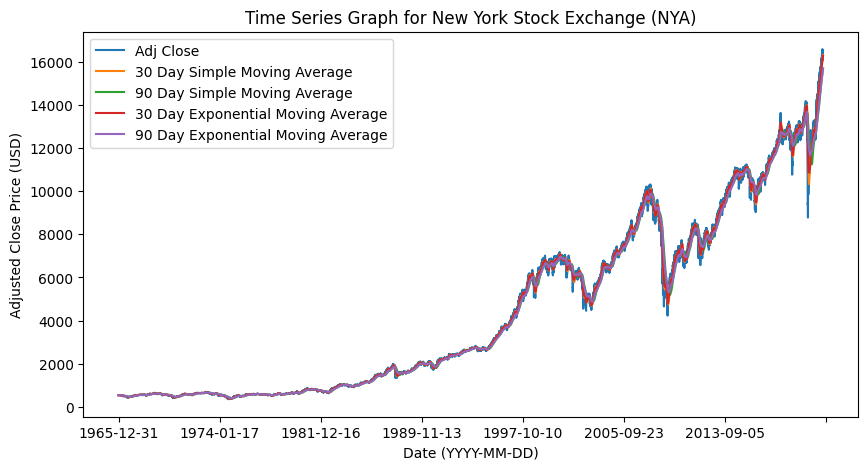

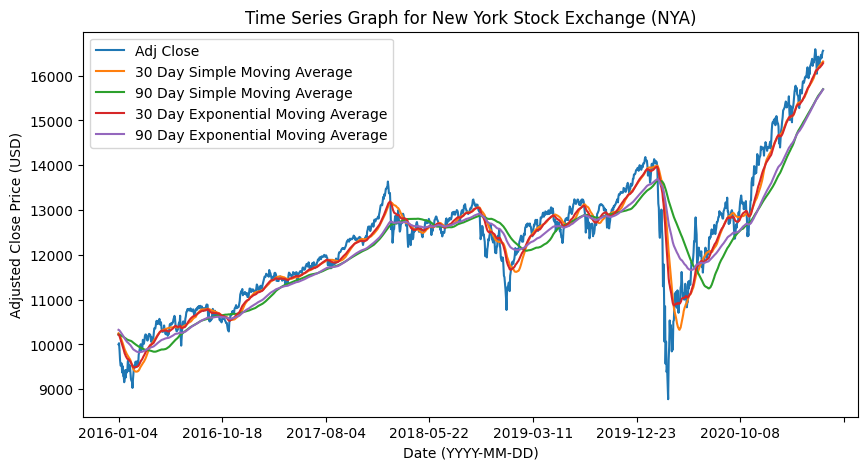

In [27]:
# Focus on the NYA data to simplify our analysis, and remove the 360 day moving
# average column as it won't be used in our analysis.
nya_data = data_frames_per_index["NYA"].drop(columns=["360 Day Simple Moving Average"])

# Plot the NYA data to compare how the moving average strategies perform.
nya_data.plot(
    x="Date",
    y=[
        "Adj Close",
        "30 Day Simple Moving Average",
        "90 Day Simple Moving Average",
        "30 Day Exponential Moving Average",
        "90 Day Exponential Moving Average",
    ],
    xlabel="Date (YYYY-MM-DD)",
    ylabel="Adjusted Close Price (USD)",
    title=f"Time Series Graph for New York Stock Exchange (NYA)",
    figsize=(10, 5),
)

# Plot the NYA data from the last five years to zoom into how the moving
# average strategies perform.
nya_data_last_5y = nya_data[(nya_data["Date"] > "2016-00-00")]
nya_data_last_5y.plot(
    x="Date",
    y=[
        "Adj Close",
        "30 Day Simple Moving Average",
        "90 Day Simple Moving Average",
        "30 Day Exponential Moving Average",
        "90 Day Exponential Moving Average",
    ],
    xlabel="Date (YYYY-MM-DD)",
    ylabel="Adjusted Close Price (USD)",
    title=f"Time Series Graph for New York Stock Exchange (NYA)",
    figsize=(10, 5),
)


## Modelling

### Generate Training and Test Data Sets for NYA Index


In [25]:
# Generate a training and test data set for the NYA index.
training_data, test_data = train_test_split(nya_data, train_size=0.8, shuffle=True)
print("Training Data:")
display(training_data)
print("Test Data:")
display(test_data)


Training Data:


,Date,Index,Adj Close,30 Day Simple Moving Average,90 Day Simple Moving Average,30 Day Exponential Moving Average,90 Day Exponential Moving Average
11363,1977-06-28,NYA,580.919983,571.440002,573.304224,574.586456,574.812632
9352,1969-07-14,NYA,553.750000,579.603339,594.992223,578.682669,593.031027
19572,2010-01-08,NYA,7425.350098,7198.615039,7038.762999,7217.166122,6983.714909
16275,1996-12-02,NYA,4209.830078,4067.936336,3894.348668,4088.766361,3940.435406
20296,2012-11-23,NYA,8225.509766,8186.303630,8122.166889,8148.374446,8108.103266
...,...,...,...,...,...,...,...
19459,2009-07-29,NYA,6280.569824,5948.216667,5729.002772,6025.368412,5806.297259
9876,1971-08-09,NYA,546.239990,573.701664,586.060444,569.181756,575.323419
10174,1972-10-10,NYA,636.960022,636.207668,635.189668,636.212491,635.036679
21230,2016-08-10,NYA,10774.980470,10682.938641,10471.755252,10677.776099,10473.032518


Test Data:


,Date,Index,Adj Close,30 Day Simple Moving Average,90 Day Simple Moving Average,30 Day Exponential Moving Average,90 Day Exponential Moving Average
10150,1972-09-06,NYA,642.989990,643.041333,635.061667,642.880938,635.662410
12381,1981-07-10,NYA,794.619995,807.011334,810.609110,803.914952,806.141083
12974,1983-11-10,NYA,1001.859985,1015.829659,1012.758776,1009.170817,1008.248483
12948,1983-10-05,NYA,1025.969971,1016.143996,1014.061556,1018.848339,1005.020757
12866,1983-06-09,NYA,992.340027,999.523336,949.619331,992.948421,952.391354
...,...,...,...,...,...,...,...
13011,1984-01-05,NYA,1029.250000,1008.082670,1014.014664,1007.202780,1008.251867
18762,2006-10-19,NYA,8700.809570,8477.163639,8266.543658,8508.871980,8347.587538
16016,1995-11-22,NYA,3380.530029,3322.054671,3256.252555,3327.692626,3250.029437
12493,1981-12-17,NYA,754.650024,758.671997,749.004444,757.513925,757.905458
